<a href="https://colab.research.google.com/github/kangmg/compchem_with_colab/blob/main/openbabel_install.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version # Python 3.10.12
!cmake --version # cmake version 3.27.9
!make --version # GNU Make 4.3

Python 3.10.12
cmake version 3.27.9

CMake suite maintained and supported by Kitware (kitware.com/cmake).
GNU Make 4.3
Built for x86_64-pc-linux-gnu
Copyright (C) 1988-2020 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.


In [19]:
"""
Runtime : ~3 mins
"""

# clear cell output
from IPython.display import clear_output

# 의존성 프로그램 설치
!apt install swig # version : 4.0.2

# openbabel 소스코드 설치
!wget -q https://github.com/openbabel/openbabel/archive/refs/tags/openbabel-3-1-1.tar.gz -O openbable.tar.gz
!tar vxf ./openbable.tar.gz
!rm ./openbable.tar.gz

# 소스코드 빌드 & 파이썬 바인딩
!mkdir ./build
%cd build
!cmake ../openbabel-openbabel-3-1-1 -DPYTHON_BINDINGS=ON -DRUN_SWIG=ON
clear_output()
!echo "%%%%%%%%     Compiling . . .  %%%%%%%%"
!make -j2
clear_output()
!echo "%%%%%%%%     Building . . .  %%%%%%%%"
!make install
%cd ..
clear_output()
!echo "openbabel successfully installed"

openbabel successfully installed


In [9]:
!obabel # Open Babel 3.1.0

No input file or format spec or possibly a misplaced option.
Most options must come after the input files. (-i -o -O -m can be anywhwere.)

Open Babel 3.1.0 -- May 21 2024 -- 07:50:18
Usage:
obabel [-i<input-type>] <infilename> [-o<output-type>] -O<outfilename> [Options]
Try  -H option for more information.


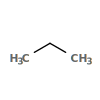

In [5]:
from openbabel import openbabel, pybel
molecule = pybel.readstring("smi", 'CCC')
molecule

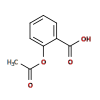

21

C          1.01913        0.13769       -0.40443
C          2.51231        0.19313       -0.35802
O          3.08231        1.27429       -0.41365
O          3.21693       -0.96805       -0.27870
C          4.56598       -1.05189       -0.16288
C          5.23336       -1.79195       -1.14927
C          6.62311       -1.88730       -1.15700
C          7.36905       -1.24141       -0.17671
C          6.72749       -0.51277        0.82520
C          5.31903       -0.41286        0.87056
C          4.71467        0.33764        2.02122
O          5.42266        1.06853        2.69726
O          3.43070        0.17493        2.41078
H          0.58885        1.15936       -0.47773
H          0.63773       -0.34781        0.51779
H          0.69792       -0.45267       -1.28760
H          4.66652       -2.28245       -1.93106
H          7.12285       -2.45537       -1.93107
H          8.44916       -1.31242       -0.18633
H          7.34231       -0.04184        1.58230
H          2.849

In [18]:
from openbabel import openbabel, pybel

aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
aspirin = pybel.readstring("smi", aspirin_smiles)

display(aspirin)

# optimize
aspirin.localopt(forcefield="uff")

# opt xyz
print(aspirin.write("xyz"))
